In [1]:
"""Keras is the high-level API of the TensorFlow platform"""

'Keras is the high-level API of the TensorFlow platform'

In [2]:
import tensorflow as tf
import keras
from keras import layers

/Users/ravi_medabalimi/venv-metal/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


### Sequential model 
A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

In [4]:
# Creating sequence model

model = keras.Sequential(
    [
        layers.Dense(5, activation = 'relu'),
        layers.Dense(3, activation = 'relu'),
        layers.Dense(1, activation = 'relu')
    ]
)

x = tf.ones((3,5))
y = model(x)
y

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.]], dtype=float32)>

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (3, 5)                 │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (3, 3)                 │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (3, 1)                 │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
for parms in model.trainable_variables:
    print(parms)

<Variable path=sequential_1/dense_3/kernel, shape=(5, 5), dtype=float32, value=[[-0.32417348  0.4662559  -0.67857087 -0.1577195  -0.48487014]
 [ 0.11234421 -0.5746653   0.11623573 -0.27078468 -0.6818452 ]
 [-0.5596482  -0.60371554 -0.36236235  0.5228622   0.42783296]
 [ 0.0519278  -0.6501577   0.04640317  0.40692914  0.74995816]
 [-0.42479393  0.32910216 -0.19998103  0.17829633  0.7586607 ]]>
<Variable path=sequential_1/dense_3/bias, shape=(5,), dtype=float32, value=[0. 0. 0. 0. 0.]>
<Variable path=sequential_1/dense_4/kernel, shape=(5, 3), dtype=float32, value=[[-0.40919894 -0.25658554  0.49834186]
 [ 0.83601385  0.01643223 -0.18709606]
 [-0.6023885  -0.7459686   0.69452924]
 [-0.78298527 -0.13203949 -0.01499248]
 [ 0.47623116 -0.5930341  -0.75881696]]>
<Variable path=sequential_1/dense_4/bias, shape=(3,), dtype=float32, value=[0. 0. 0.]>
<Variable path=sequential_1/dense_5/kernel, shape=(3, 1), dtype=float32, value=[[-0.6532682 ]
 [-1.0454537 ]
 [ 0.98967993]]>
<Variable path=sequent

In [7]:
# Creating sequence model using add() method, assingning name for layers and specifying input shape

model = keras.Sequential(name="seq_model")
model.add(layers.Dense(3, activation='relu', input_shape=(5,), name='layer_1'))
model.add(layers.Dense(3, activation='relu', name='layer_2'))
model.add(layers.Dense(1, activation='relu', name='layer_3'))

model.summary()

/Users/ravi_medabalimi/venv-metal/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
y = model(x)
model.summary()

Model: "seq_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer_1 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_2 (Dense)                 │ (None, 3)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

**
When building a new Sequential architecture, it's useful to incrementally stack layers with add() and frequently print model summaries. 

In [9]:
model.layers

[<Dense name=layer_1, built=True>,
 <Dense name=layer_2, built=True>,
 <Dense name=layer_3, built=True>]

Once a Sequential model has been built, it behaves like a Functional API model. This means that every layer has an input and output attribute.

In [10]:
# feature extracts the outputs of all intermediate layers in a Sequential model



feature_extractor = keras.Model(
    inputs = model.inputs,
    outputs = model.get_layer(name='layer_2').output
)

features = feature_extractor(x)
features

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.7155904, 0.       , 1.5044191],
       [0.7155904, 0.       , 1.5044191],
       [0.7155904, 0.       , 1.5044191]], dtype=float32)>

###  The Functional API

The Keras functional API is a way to create models that are more flexible than the keras.Sequential API. The functional API can handle models with non-linear topology, shared layers, and even multiple inputs or outputs. 

The main idea is that a deep learning model is usually a directed acyclic graph (DAG) of layers. So the functional API is a way to build graphs of layers.


In [11]:
#functional API, start by creating an input node:

inputs = keras.Input(shape=(784,))
inputs.shape

(None, 784)

In [12]:
#create a new node in the graph of layers by calling a layer on this inputs object:

dense = layers.Dense(64, activation='relu')
x = dense(inputs)

#add a few more layers to the graph of layers:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)


model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
! pip install pydot

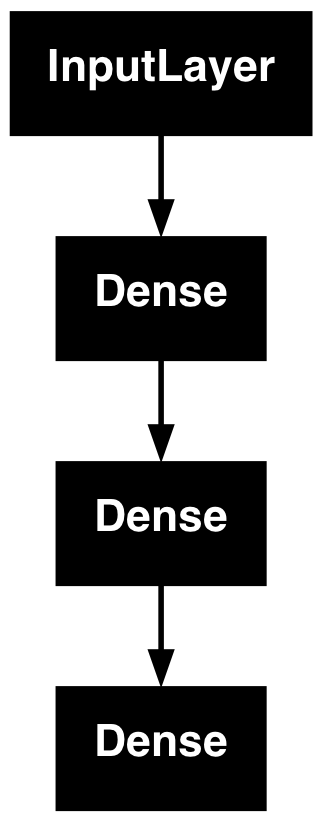

In [14]:
keras.utils.plot_model(model, "mnist_model.png")

###  Training & evaluation with the built-in methods

This guide covers training, evaluation, and prediction (inference) models when using built-in APIs for training & validation (such as `Model.fit()`, `Model.evaluate()` and `Model.predict()`).


Training, evaluation, and inference work exactly in the same way for models built using the functional API as for Sequential models.


In [15]:
#Training, evaluation, and inference

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/2


2025-05-25 08:51:49.240827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.6109 - sparse_categorical_accuracy: 0.8198 - val_loss: 0.3189 - val_sparse_categorical_accuracy: 0.9111
Epoch 2/2
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.3282 - sparse_categorical_accuracy: 0.9098 - val_loss: 0.3295 - val_sparse_categorical_accuracy: 0.9062
313/313 - 1s - 4ms/step - loss: 0.3287 - sparse_categorical_accuracy: 0.9096
Test loss: 0.32867729663848877
Test accuracy: 0.909600019454956


In [26]:
# Model Predict

print("ground truth values", y_test[:3])

y_pred = model.predict(x_test[:3])
y_pred

ground truth values [7 2 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ -0.14790918, -16.43141   ,  -2.6092741 ,   4.8851986 ,
         -6.909391  ,  -0.9957975 , -15.974167  ,  12.1343565 ,
         -2.0096138 ,   2.653229  ],
       [  7.200406  ,   5.395974  ,  17.673792  ,   8.46993   ,
        -17.154728  ,   6.9063716 ,  12.18992   , -26.348303  ,
          6.9529366 , -12.9246025 ],
       [ -7.3705697 ,   8.201425  ,   2.0606904 ,   1.2561616 ,
         -4.0468206 ,  -1.5562435 ,   0.05364244,  -2.5099368 ,
          0.7029407 ,  -2.5521073 ]], dtype=float32)

In [27]:
[out.argmax() for out in y_pred]

[7, 2, 1]

Save serilize model

The standard way to save a functional model is to call `model.save()` to save the entire model as a single file. You can later recreate the same model from this file, even if the code that built the model is no longer available.

This saved file includes the:

    model architecture
    model weight values (that were learned during training)
    model training config, if any (as passed to compile)
    optimizer and its state, if any (to restart training where you left off)


In [22]:
model.save('./mnist_model.keras')

In [23]:
del model

In [25]:
model = keras.models.load_model('./mnist_model.keras')

model.summary()

Model: "mnist_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,102 (430.09 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 55,052 (215.05 KB)

In [ ]:
# Creating 